## Importing all the required libraries 

In [1]:
import tensorflow as tf
import numpy as np
import cv2
from keras.preprocessing import image
import pickle
import matplotlib.pyplot as plt
import random
import os
import time

### Loading images and labels

In [2]:
path = r'/home/chhabilal/Desktop/project/men_women_classification/data/traindata/'
CATEGORIES = ['men', 'women']


### Image Preprocessing

In [3]:
data = []
for category in CATEGORIES:
    folder_path = os.path.join(path, category)
    if category == 'men':
        label = 0
    else:
        label = 1
            
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        photo = image.load_img(img_path, target_size = (120,120))
        photo = image.img_to_array(photo)
        photo = photo.astype('uint8')
        data.append([photo, label])
   
        
        
       
     

        

In [4]:
random.shuffle(data)

In [5]:
x = []
y = []
for img , labels in data:
    x.append(img)
    y.append(labels)
    

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
len(y)

2912

In [8]:
#### Feature Scaling 
x = x/255

In [9]:
x.shape

(2912, 120, 120, 3)

### Building CNN model

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [13]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = (120,120,3) ,activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 118, 118, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 57, 57, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)      

In [78]:
### Compiling the model
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
model.fit(x,y, epochs = 10, validation_split=0.1, batch_size= 32)

Epoch 1/10
82/82 [==============================] - 39s 473ms/step - loss: 0.6496 - accuracy: 0.6561 - val_loss: 0.6504 - val_accuracy: 0.6541
Epoch 2/10
82/82 [==============================] - 39s 473ms/step - loss: 0.6140 - accuracy: 0.6656 - val_loss: 0.6268 - val_accuracy: 0.6712
Epoch 3/10
82/82 [==============================] - 38s 465ms/step - loss: 0.6042 - accuracy: 0.6813 - val_loss: 0.7002 - val_accuracy: 0.6575
Epoch 4/10
82/82 [==============================] - 38s 463ms/step - loss: 0.5932 - accuracy: 0.6927 - val_loss: 0.6338 - val_accuracy: 0.6370
Epoch 5/10
82/82 [==============================] - 38s 469ms/step - loss: 0.5609 - accuracy: 0.7141 - val_loss: 0.6350 - val_accuracy: 0.6678
Epoch 6/10
82/82 [==============================] - 38s 465ms/step - loss: 0.5092 - accuracy: 0.7592 - val_loss: 0.6347 - val_accuracy: 0.6610
Epoch 7/10
82/82 [==============================] - 38s 468ms/step - loss: 0.4570 - accuracy: 0.7779 - val_loss: 0.6285 - val_accuracy: 0.6747

### Prediction using trained model

Women


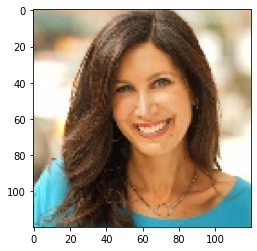

In [88]:
test_image = image.load_img("data/testdata/women/00000084.jpg", target_size = (120,120))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
  prediction = 'Women'
  print(prediction)
else:
  prediction = 'Men'
  print(prediction)


### Improving the Accuracy by using Data Augmentation

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range = 0.2,
    horizontal_flip= True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'data/traindata',
    target_size = (120,120),
    batch_size = 16,
    class_mode = 'binary'
)

testing_set = test_datagen.flow_from_directory(
  'data/testdata',
    target_size = (120,120),
    batch_size = 16,
    class_mode = 'binary'
)



Found 2891 images belonging to 2 classes.
Found 1330 images belonging to 2 classes.


In [91]:
model.fit_generator(
    training_set,
    steps_per_epoch= 180,
    epochs = 10,
    validation_data= testing_set,
    validation_steps= 80

)

<ipython-input-91-15501da7219f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
180/180 [==============================] - 67s 373ms/step - loss: 0.5142 - accuracy: 0.7468 - val_loss: 0.4266 - val_accuracy: 0.8242
Epoch 2/10
180/180 [==============================] - 63s 347ms/step - loss: 0.4631 - accuracy: 0.7746 - val_loss: 0.4136 - val_accuracy: 0.8086
Epoch 3/10
180/180 [==============================] - 63s 352ms/step - loss: 0.4528 - accuracy: 0.7753 - val_loss: 0.4630 - val_accuracy: 0.7859
Epoch 4/10
180/180 [==============================] - 63s 352ms/step - loss: 0.4266 - accuracy: 0.7965 - val_loss: 0.4335 - val_accuracy: 0.7906
Epoch 5/10
180/180 [==============================] - 63s 353ms/step - loss: 0.3941 - accuracy: 0.8195 - val_loss: 0.4099 - val_accuracy: 0.8336
Epoch 6/10
180/180 [==============================] - 63s 351ms/step - loss: 0.3757 - accuracy: 0.8306 - val_loss: 0.4114 - val_accuracy: 0.8297
Epoch 7/10
180/180 [==============================] - 63s 349ms/step - loss: 0.3615 - accuracy: 0.8369 - val_loss: 0.4605 - val_ac

### Prediction using trained model

Men


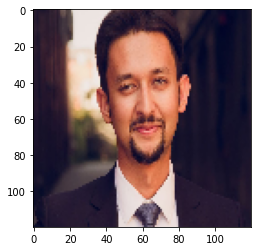

In [92]:
test_image = image.load_img("data/testdata/men/00000042.jpg", target_size = (120,120))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
  prediction = 'Women'
  print(prediction)
else:
  prediction = 'Men'
  print(prediction)


### Save the Model

In [15]:
model.save('model.h5')